# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in `figures.py`. Figures are saved in PDF format in the `figures/` folder.


# Contents
* [Libraries and variables](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. Wright-Fisher simulation and mutational effects inference](#simulation)
    * [Figure 2. MPL is more consistent across replicates than current methods](#performance)
    * [Figure 3. Visualizations of MPL_DMS](#visualization)

## Libraries and variables<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

import warnings

import figures as figs

from importlib import reload

Figures below were produced using the following packages:
python == 3.7.6 (default, Dec 27 2019, 09:51:07) 
[Clang 11.0.0 (clang-1100.0.33.16)]
numpy == 1.21.6
scipy == 1.7.3
pandas == 1.3.5
matplotlib == 3.5.1
seaborn == 0.9.0


## Figures and data analysis<a class = "anchor" id = "figure"></a>

### Figure 1. Wright-Fisher simulation and mutational effects inference<a class = "anchor" id = "simulation"></a>

/Users/zhenchenhong/Downloads/Github_DMS/paper-DMS-inference/figures.py:317: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


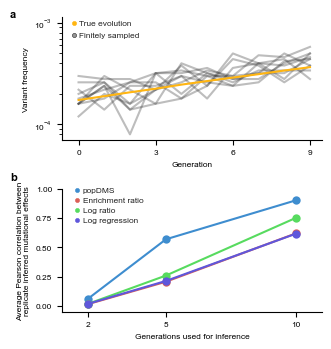

In [2]:
reload(figs)
figs.FIG1_SIMULATION_FINITE_SAMPLING()
plt.show()

### Figure 2. MPL is more consistent across replicates than current methods<a class = "anchor" id = "performance"></a>

/Users/zhenchenhong/Downloads/Github_DMS/paper-DMS-inference/figures.py:557: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([name2name[label] for label in x], rotation = 45, ha = 'right')


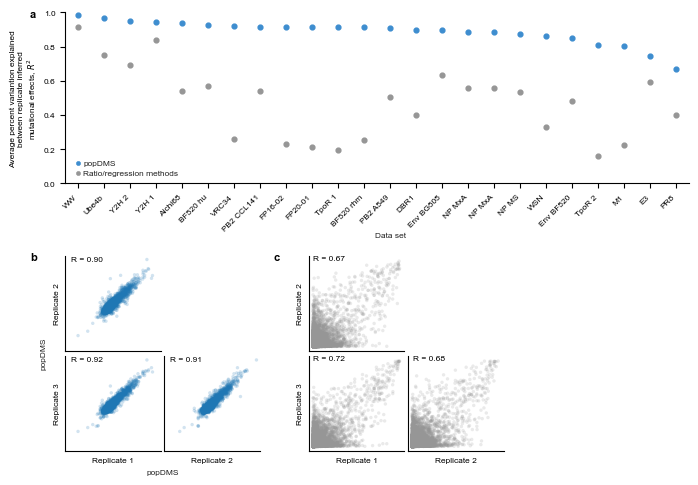

In [3]:
reload(figs)
figs.FIG2_METHODS_COMPARISON()
plt.show()

### Figure X. Selection coefficients vs. Preferences<a class = "anchor" id = "Sele_Pref_correlation"></a>

How about putting this in Figure2 as 2d?

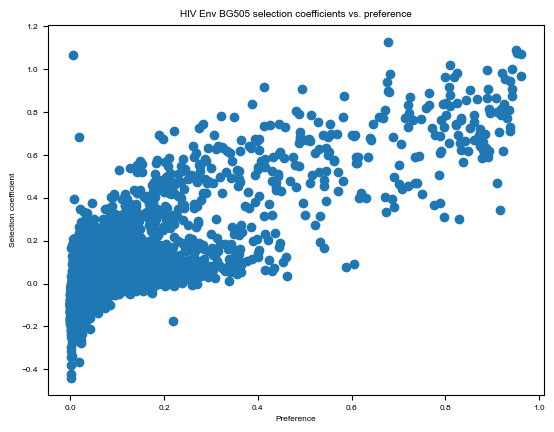

In [4]:
sele_list = []
pref_list = []

df_sele = pd.read_csv('./outputs/selection_coefficients/HIV Env BG505_-3.csv.gz')
df_sele = df_sele[df_sele['amino_acid']!='*']

df_pref = pd.read_csv('./data/prefs/HIV Env BG505_avgprefs.csv')
df_pref = df_pref.drop('site', axis=1)

for site in range(df_pref.shape[0]):
    for aa in df_sele['amino_acid'].unique():
        sele_list.append(df_sele.loc[(df_sele['site']==site) & (df_sele['amino_acid']==aa)]['rep_1'])
        pref_list.append(df_pref.iloc[site][aa])
plt.scatter(pref_list, sele_list)
st.pearsonr(pref_list, sele_list)
plt.xlabel('Preference')
plt.ylabel('Selection coefficient')
plt.title('HIV Env BG505 selection coefficients vs. preference')
plt.show()

### Figure XX. Selection coefficients/Preferences vs. Natural frequency<a class = "anchor" id = "Sele_pref_natual_freq"></a>

Pearson correlation(preference vs. natural frequency): 0.6759619082177992
Spearman correlation(preference vs. natural frequency): 0.36729891010487814


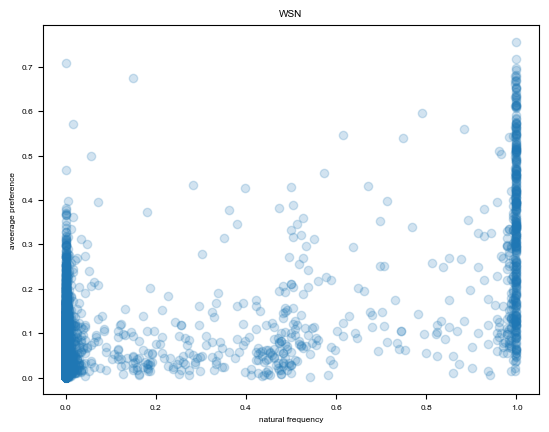

Pearson correlation(selection coefficient vs. natural frequency): 0.8089417423152986
Spearman correlation(selection coefficient vs. natural frequency): 0.3508801807792677


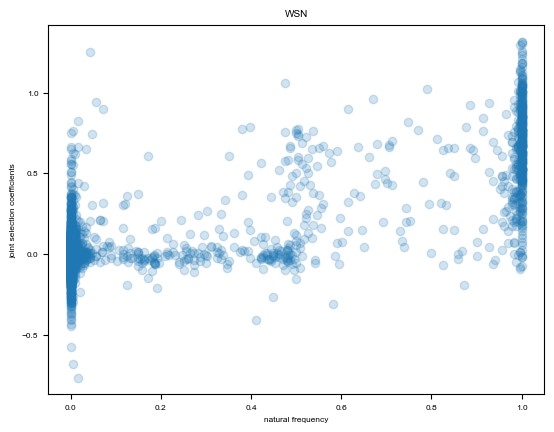

In [5]:
df_freq = pd.read_csv('./data/raw_data/H1_HumanSwine_alignment_frequencie.txt', sep="\t")
df_freq = df_freq.drop(['SITE_ENTROPY', 'WT_AA', '#SITE'], axis=1)
df_sele = pd.read_csv('./outputs/selection_coefficients/WSN_-2.csv.gz')
# df_sele = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/outputs/selection_coefficients/WSN_-2.csv.gz')
df_sele['amino_acid'] = 'PI_'+df_sele['amino_acid']
df_sele = df_sele[df_sele['amino_acid']!='PI_*']
df_pref1 = pd.read_csv('./data/prefs/WSN-1_prefs.txt', sep="\t")
df_pref1 = df_pref1.drop(['#SITE', 'WT_AA', 'SITE_ENTROPY', 'PI_*'], axis = 1)
df_pref2 = pd.read_csv('./data/prefs/WSN-2_prefs.txt', sep="\t")
df_pref2 = df_pref2.drop(['#SITE', 'WT_AA', 'SITE_ENTROPY', 'PI_*'], axis = 1)
df_pref3 = pd.read_csv('./data/prefs/WSN-3_prefs.txt', sep="\t")
df_pref3 = df_pref3.drop(['#SITE', 'WT_AA', 'SITE_ENTROPY', 'PI_*'], axis = 1)
df_pref = pd.concat([df_pref1, df_pref2, df_pref3]).groupby(level=0).mean()

natural_freq = list(df_freq.iloc[1:].values.flatten())
pref = list(df_pref.values.flatten())
print('Pearson correlation(preference vs. natural frequency):', st.pearsonr(natural_freq, pref)[0])
print('Spearman correlation(preference vs. natural frequency):', st.spearmanr(natural_freq, pref)[0])
plt.scatter(natural_freq, pref, alpha=0.2)
plt.xlabel('natural frequency')
plt.ylabel('aveerage preference')
plt.title('WSN')
plt.show()

sele_list = []
freq_list = []

for site in range(df_freq.shape[0]):
    for aa in df_sele['amino_acid'].unique():
        sele_list.append(df_sele.loc[(df_sele['site']==site) & (df_sele['amino_acid']==aa)]['joint'].values[0])
        freq_list.append(df_freq.iloc[site][aa])
print('Pearson correlation(selection coefficient vs. natural frequency):', st.pearsonr(sele_list, freq_list)[0])
print('Spearman correlation(selection coefficient vs. natural frequency):', st.spearmanr(sele_list, freq_list)[0])

plt.scatter(freq_list, sele_list, alpha=0.2)
plt.title('MPL vs. natural frequency')
plt.xlabel('natural frequency')
plt.ylabel('joint selection coefficients')
plt.title('WSN')
plt.show()

### Figure 3. Visualizations of MPL_DMS<a class = "anchor" id = "visualization"></a>

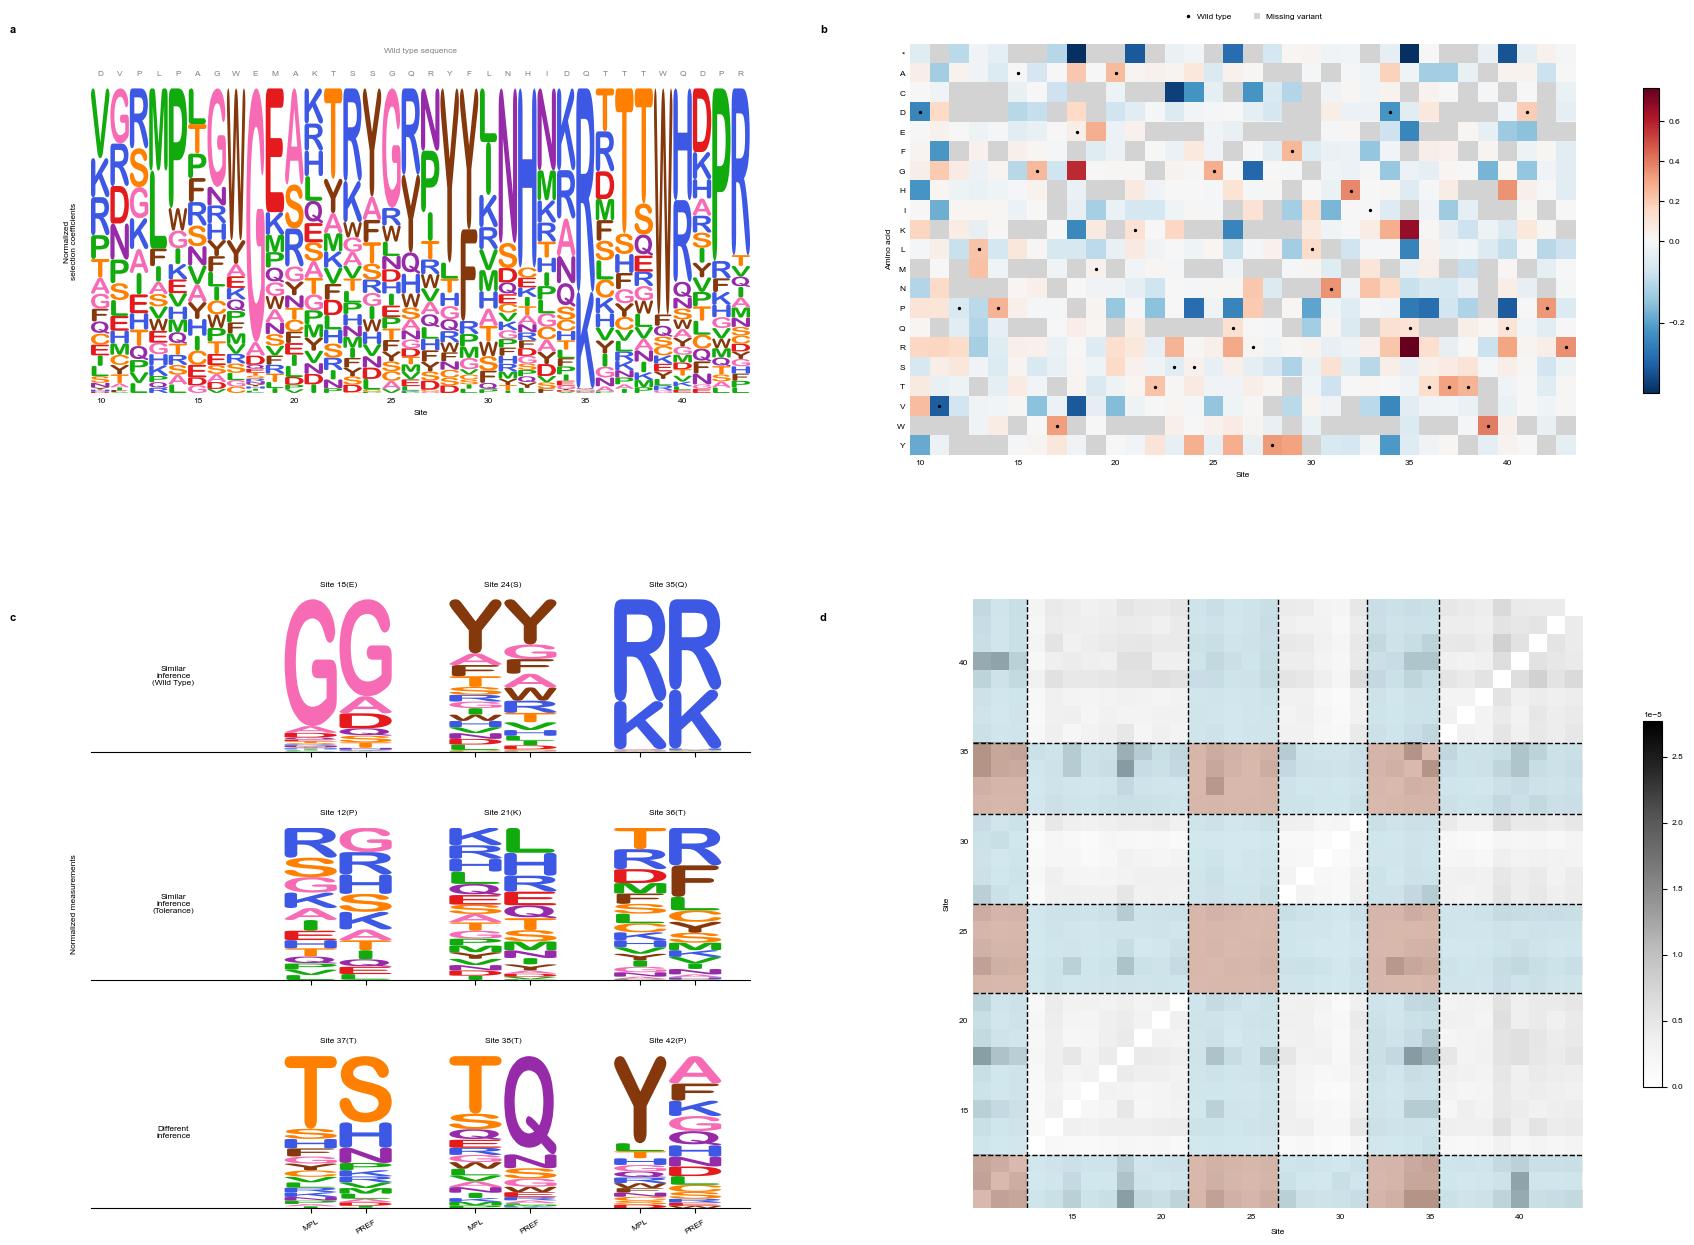

<Figure size 640x480 with 0 Axes>

In [6]:
reload(figs)
figs.FIG3_VISUALIZATION()
plt.show()

### Figure4. Visualizations of Epistasis<a class = "anchor" id = "visualization"></a>

/Users/zhenchenhong/Downloads/Github_DMS/paper-DMS-inference/figures.py:1212: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new=df_new.groupby(['site_1_y', 'site_2_y'])['epistasis_paper', 'epistasis_MPL_cons_1'].agg('sum').reset_index()
/Users/zhenchenhong/Downloads/Github_DMS/paper-DMS-inference/figures.py:1248: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_MPL = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute', 'epistasis_paper_absolute'].agg('sum').reset_index().sort_values('epistasis_MPL_absolute')
/Users/zhenchenhong/Downloads/Github_DMS/paper-DMS-inference/figures.py:1249: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_func = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute',

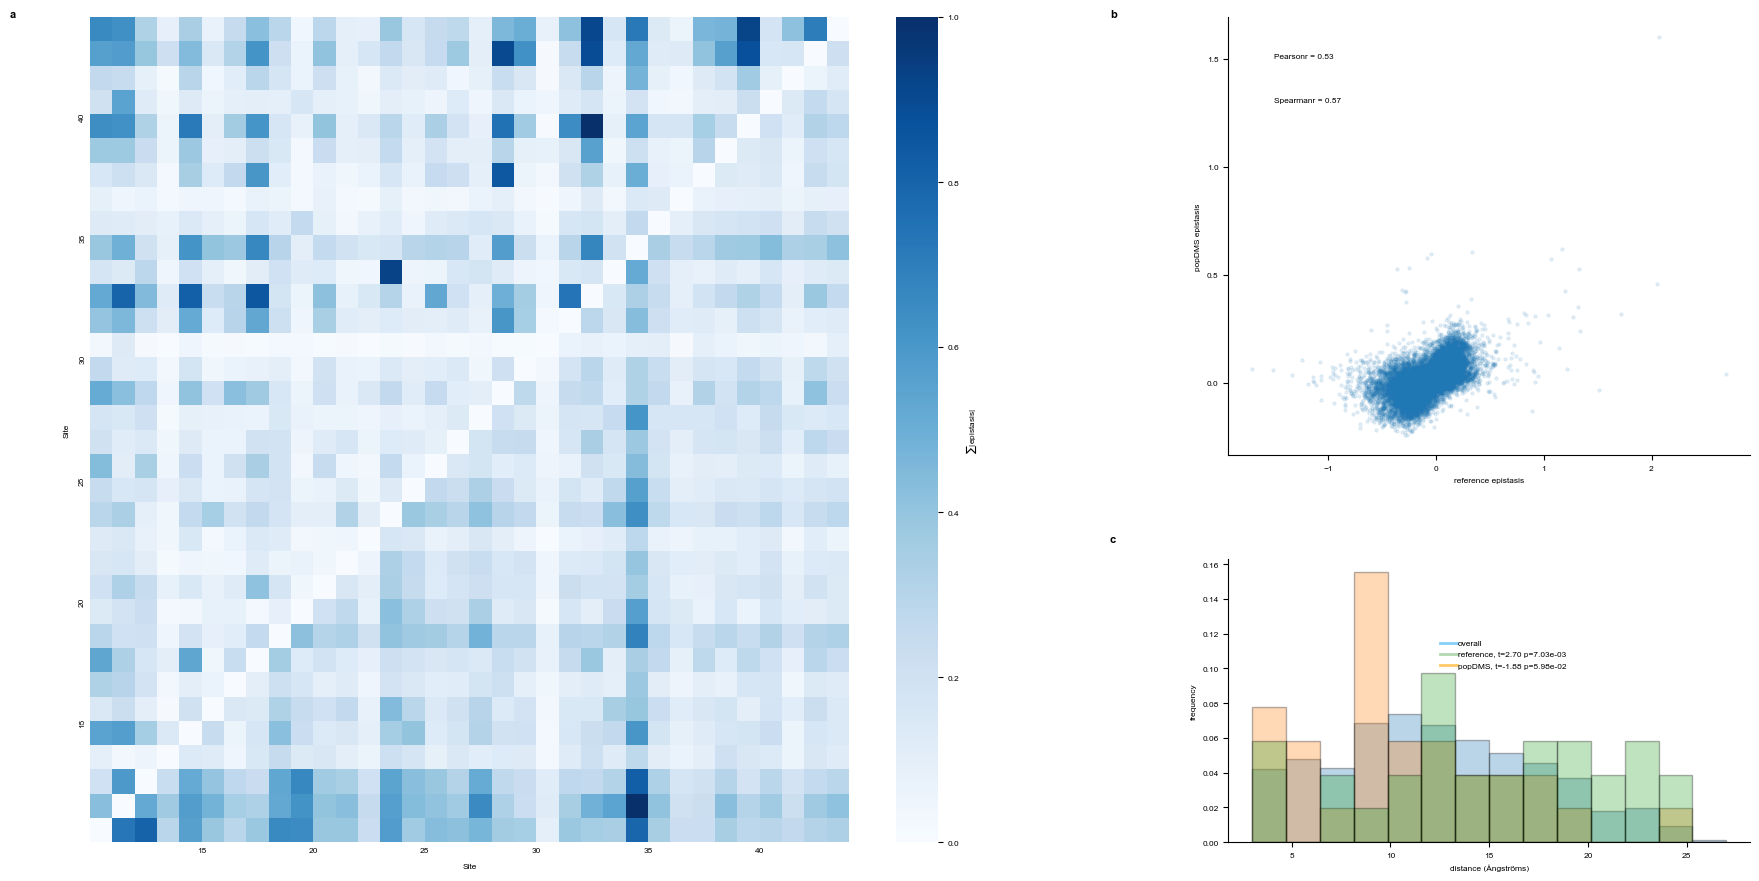

In [7]:
reload(figs)
figs.FIG4_VISUALIZATION()

### Supplemental figure 1. Epistasis scatter<a class = "anchor" id = "epistasis supp"></a>

                         selection_coefficient_x  selection_coefficient_y
selection_coefficient_x                 1.000000                 0.999314
selection_coefficient_y                 0.999314                 1.000000 (34859, 6)


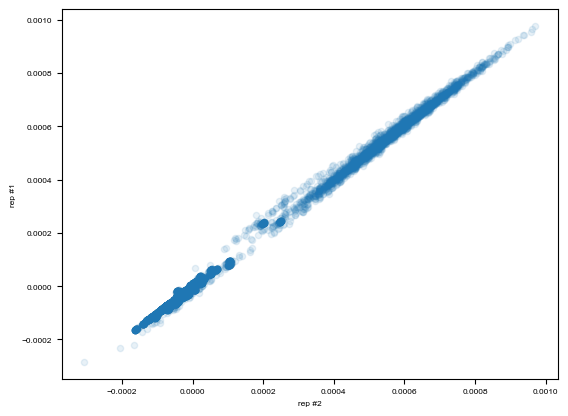

In [8]:
reload(figs)
figs.SUPPFIG1_EPISTASIS()